In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
%cd ..
%cd ..
!ls

/home/arunn/Documents/omdena/reddot
/home/arunn/Documents/omdena
cases_monthly_statewise.json	   reddot
cases_yearly_nature_vs_state.json  twitter_data.csv


In [3]:
data = pd.read_json('cases_monthly_statewise.json')

In [4]:
data = data.fillna(0)

In [5]:
numerics = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Total', 'Year']

In [6]:
for i in range(data.shape[0]):
    if data.at[i,'State']== 0:
        data = data.drop([i])
data[numerics] = data[numerics].apply(pd.to_numeric)
data.head()

,State,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Year
1,Andaman and Nicobar Islands,0,0,0,0,0,0,0,1,0,0,0,0,1,2000
2,Andhra Pradesh,5,4,2,6,3,0,5,2,4,2,1,5,39,2000
3,Assam,2,0,0,2,2,0,1,1,0,3,0,1,12,2000
4,Bihar,30,20,28,18,32,9,42,66,34,36,15,12,342,2000
5,Chandigarh,0,1,0,0,1,0,2,1,1,1,1,2,10,2000


In [18]:
data

,State,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Year
1,Andaman and Nicobar Islands,0,0,0,0,0,0,0,1,0,0,0,0,1,2000
2,Andhra Pradesh,5,4,2,6,3,0,5,2,4,2,1,5,39,2000
3,Assam,2,0,0,2,2,0,1,1,0,3,0,1,12,2000
4,Bihar,30,20,28,18,32,9,42,66,34,36,15,12,342,2000
5,Chandigarh,0,1,0,0,1,0,2,1,1,1,1,2,10,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Tripura,0,1,0,0,0,0,0,0,0,0,0,0,1,2020
760,Uttar Pradesh,851,847,699,159,353,0,0,0,0,0,0,0,2909,2020
761,Uttarakhand,17,17,17,9,15,0,0,0,0,0,0,0,75,2020
762,West Bengal,24,19,24,36,34,0,0,0,0,0,0,0,137,2020


In [20]:
data.to_csv('data.csv', index=False)

In [21]:
!ls

cases_monthly_statewise.json	   data.csv  twitter_data.csv
cases_yearly_nature_vs_state.json  reddot


---
## Analysis by States

### Overall Reported Cases Analysis

In [32]:
data.groupby('State')['Total'].sum().sort_values(ascending=False)

State
Total                          312768
Uttar Pradesh                  163290
Delhi                           41268
Rajasthan                       19041
Haryana                         17425
Madhya Pradesh                  11970
Bihar                           10914
Maharashtra                      9137
Uttarakhand                      6175
Punjab                           4559
Jharkhand                        4089
West Bengal                      4004
Tamil Nadu                       3803
Karnataka                        3097
Gujarat                          2044
Andhra Pradesh                   1796
Telangana                        1767
Chhattisgarh                     1763
Odisha                           1682
Himachal Pradesh                 1020
Kerala                           1015
Assam                             737
Chandigarh                        678
Jammu and Kashmir                 564
Pondicherry                       198
Goa                               180
Andama

### Analysis for 2020 by States

In [22]:
df_2020 = data[data['Year']==2020].copy().reset_index(drop=True)

In [23]:
df_2020.head()

,State,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Year
0,Andaman and Nicobar Islands,1,0,1,0,0,0,0,0,0,0,0,0,2,2020
1,Andhra Pradesh,12,10,10,14,9,0,0,0,0,0,0,0,55,2020
2,Assam,5,2,7,10,4,0,0,0,0,0,0,0,28,2020
3,Bihar,49,51,52,54,50,0,0,0,0,0,0,0,256,2020
4,Chandigarh,3,1,4,3,1,0,0,0,0,0,0,0,12,2020


In [24]:
df2020 = df_2020[['State','Jan','Feb','Mar','Apr','May','Total','Year']].sort_values(by=['Total'],ascending= False).reset_index(drop=True)


#### 1. Top 10 states with highest reported cases for 2020 so far

In [25]:
df2020['State']

0                           Total
1                   Uttar Pradesh
2                           Delhi
3                     Maharashtra
4                         Haryana
5                       Rajasthan
6                           Bihar
7                  Madhya Pradesh
8                       Karnataka
9                      Tamil Nadu
10                    West Bengal
11                         Punjab
12                    Uttarakhand
13                      Telangana
14                        Gujarat
15                      Jharkhand
16                 Andhra Pradesh
17                   Chhattisgarh
18                         Kerala
19                         Odisha
20                          Assam
21               Himachal Pradesh
22              Jammu and Kashmir
23                     Chandigarh
24                            Goa
25                        Manipur
26                      Meghalaya
27                    Pondicherry
28         Dadra and Nagar Haveli
29    Andaman 

In [12]:
top10 = df2020[1:11].copy()

In [15]:
top10

,State,Jan,Feb,Mar,Apr,May,Total,Year
1,Uttar Pradesh,851,847,699,159,353,2909,2020
2,Delhi,132,104,154,128,156,674,2020
3,Maharashtra,55,57,52,95,85,344,2020
4,Haryana,73,77,76,40,57,323,2020
5,Rajasthan,51,57,48,39,63,258,2020
6,Bihar,49,51,52,54,50,256,2020
7,Madhya Pradesh,55,42,51,34,44,226,2020
8,Karnataka,27,23,26,35,40,151,2020
9,Tamil Nadu,23,24,32,27,35,141,2020
10,West Bengal,24,19,24,36,34,137,2020


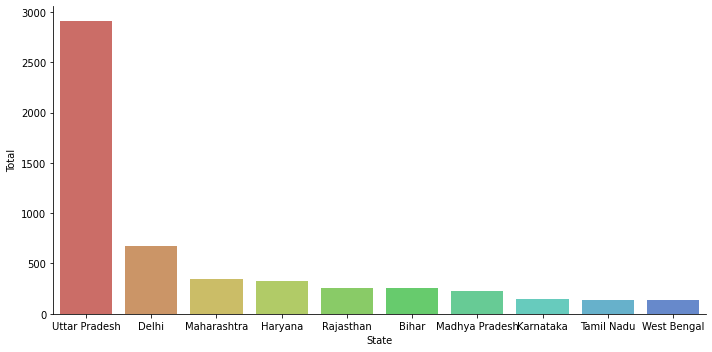

In [27]:
sns.catplot(x='State', y='Total', data = top10, kind='bar',height=5, aspect=2, palette=sns.color_palette("hls",15));

#### 2. These states have less than 10 cases reported for 2020

In [28]:
below10 = df2020.tail(8).copy()
below10

,State,Jan,Feb,Mar,Apr,May,Total,Year
24,Goa,0,2,2,3,1,8,2020
25,Manipur,0,1,0,2,1,4,2020
26,Meghalaya,0,0,2,0,0,2,2020
27,Pondicherry,1,1,0,0,0,2,2020
28,Dadra and Nagar Haveli,0,0,0,0,2,2,2020
29,Andaman and Nicobar Islands,1,0,1,0,0,2,2020
30,Daman & Diu,0,0,0,0,1,1,2020
31,Tripura,0,1,0,0,0,1,2020


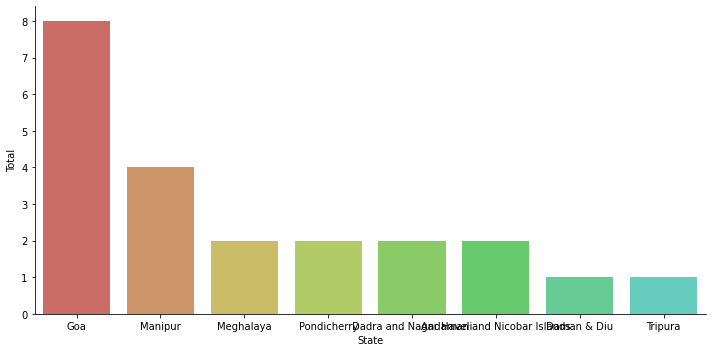

In [29]:
sns.catplot(x='State', y='Total', data = below10, kind='bar',height=5, aspect=2, palette=sns.color_palette("hls",15));

---
## Analysis by Year

In [31]:
df_yearly = data[data['State']=='Total'].copy()
df_yearly['Total'] = df_yearly.Jan + df_yearly.Feb + df_yearly.Mar + df_yearly.Apr + df_yearly.May
df_yearly_sorted = df_yearly[['Jan','Feb','Mar','Apr','May','Total','Year']].sort_values(['Year']).reset_index(drop=True)
df_yearly_sorted

,Jan,Feb,Mar,Apr,May,Total,Year
0,332,376,456,355,584,2103,2000
1,439,320,426,391,341,1917,2001
2,410,477,426,665,764,2742,2002
3,445,493,425,467,405,2235,2003
4,511,399,214,459,344,1927,2004
5,481,818,691,616,1036,3642,2005
6,958,951,993,1003,1114,5019,2006
7,1387,1016,1333,1120,1586,6442,2007
8,1399,1087,1150,1333,1135,6104,2008
9,1047,1167,1177,1196,1328,5915,2009


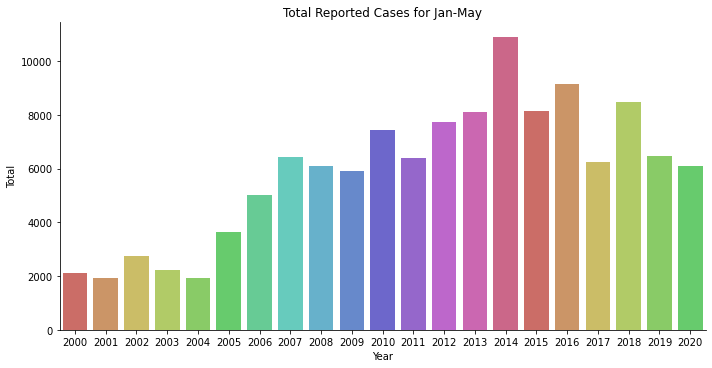

In [36]:
sns.catplot(x='Year', y='Total', data = df_yearly_sorted, kind='bar',height=5, aspect=2, palette=sns.color_palette("hls",15)).set(title='Total Reported Cases for Jan-May');

## 3. Month-wise Analysis

In [90]:
temp1 = pd.DataFrame(df_yearly.mean()[:5]).reset_index()
temp1.columns = ['Months', 'Value']
temp1['Type'] = 'Average'
temp2 = df_yearly_sorted[df_yearly_sorted['Year']==2020].transpose()[:5].reset_index()
temp2.columns = ['Months', 'Value']
temp2['Type'] = 'Current Total'
months_df = temp1.append(temp2)

In [91]:
months_df

,Months,Value,Type
0,Jan,1137.714286,Average
1,Feb,1044.000000,Average
2,Mar,1145.095238,Average
3,Apr,1195.238095,Average
4,May,1348.190476,Average
0,Jan,1462.000000,Current Total
1,Feb,1424.000000,Current Total
2,Mar,1347.000000,Current Total
3,Apr,800.000000,Current Total
4,May,1063.000000,Current Total


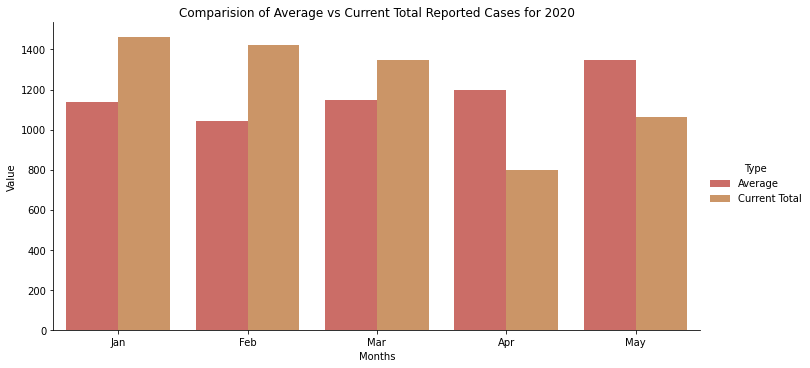

In [94]:
sns.catplot(x='Months', y='Value', data = months_df, kind='bar',height=5, hue= 'Type', aspect=2, palette=sns.color_palette("hls",15)).set(title='Comparision of Average vs Current Total Reported Cases for 2020');

#### For the year 2020, Months of Jan-March, reported cases were well above the average for each month. Hoewever in the months of April and May the reported cases have actually below the average. (Why?)